In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('M890831.csv')

In [3]:
df = df.dropna()

In [4]:
df = df.transpose()

In [5]:
df.columns = ['Date', 'Generation']

In [6]:
df = df.iloc[1:]

In [7]:
df

,Date,Generation
Unnamed: 1,2022 Aug,4921.3
Unnamed: 2,2022 Jul,4952.4
Unnamed: 3,2022 Jun,4738.8
Unnamed: 4,2022 May,4968.7
Unnamed: 5,2022 Apr,4716.2
...,...,...
Unnamed: 568,1975 May,351.4
Unnamed: 569,1975 Apr,348.6
Unnamed: 570,1975 Mar,342.8
Unnamed: 571,1975 Feb,289.6


In [8]:
df = df[~df['Date'].str.endswith('13')]

In [9]:
df

,Date,Generation
Unnamed: 1,2022 Aug,4921.3
Unnamed: 2,2022 Jul,4952.4
Unnamed: 3,2022 Jun,4738.8
Unnamed: 4,2022 May,4968.7
Unnamed: 5,2022 Apr,4716.2
...,...,...
Unnamed: 568,1975 May,351.4
Unnamed: 569,1975 Apr,348.6
Unnamed: 570,1975 Mar,342.8
Unnamed: 571,1975 Feb,289.6


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Generation'] = pd.to_numeric(df['Generation'])

In [12]:
df.dtypes

Date          datetime64[ns]
Generation           float64
dtype: object

In [13]:
df = df.set_index('Date')

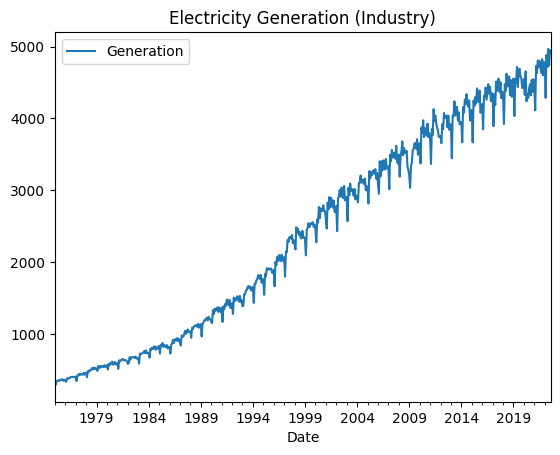

In [14]:
fig, ax = plt.subplots()
df.plot(ax=ax)
plt.title('Electricity Generation (Industry)')
plt.show()

## Stationarity


#### Three criteria:
 - Zero Trend, it isn't growing or shrinking
 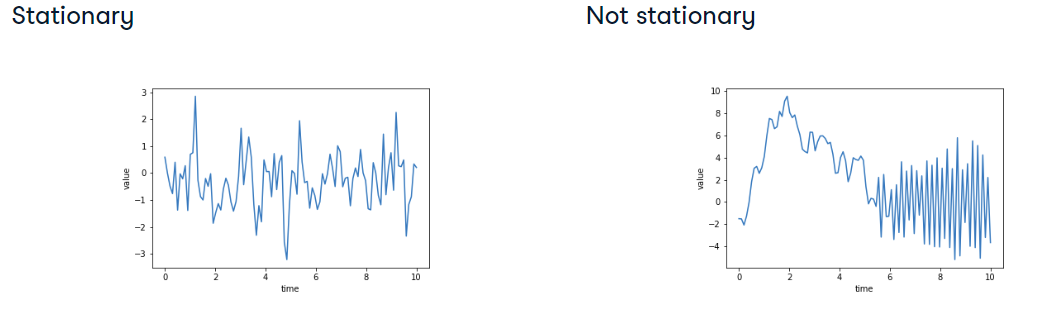
 - Variance is constant, the avg distance of data points from the zero line isn't changing
 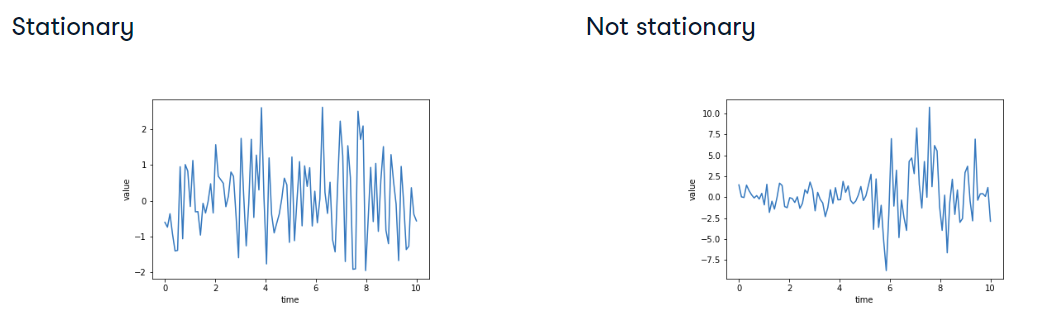
 - Autocorrelation is constant, how each value in times series is related to it's neighbors stays the same
 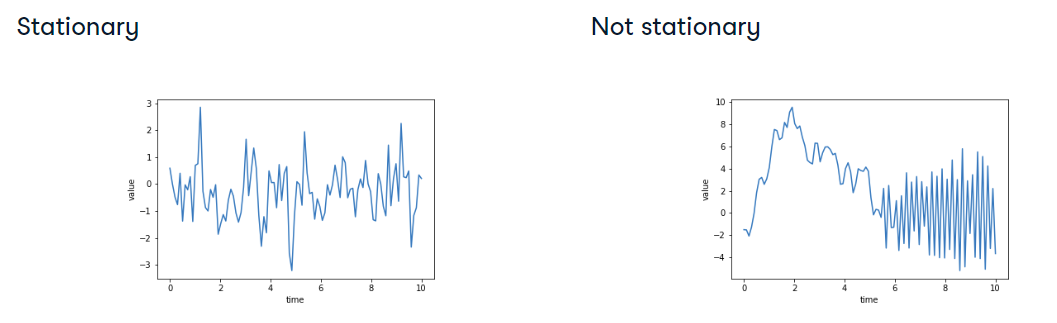

## Making time series stationary
#### Augmented Dicky-Fuller Test
 - A statistical test, where null hypothesis is that your time series is non-stationary due to trend.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
results = adfuller(df['Generation'])

### Test results
#### 0th element: Test statistic
- More negative means more likely to be stationary

#### 1st element: p-value
- if p-value is small(0.05) -> reject null hypothesis. Reject non-stationary (assume that our time series must be stationary)

#### 4th element: Critical test statistics
 - test statistic value for p-value to be 0.05

In [19]:
print('p-value: ',results[1])
print('test statstic:', results[0])

p-value:  0.6531640796580729
test statstic: -1.2467608784446649


Since our p-value is not small(0.05), we cannot reject the null hypothesis so our data is non-stationary

### Non-stationary -> stationary
how? By taking the difference
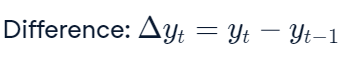

In [20]:
df_stationary = df.diff().dropna()

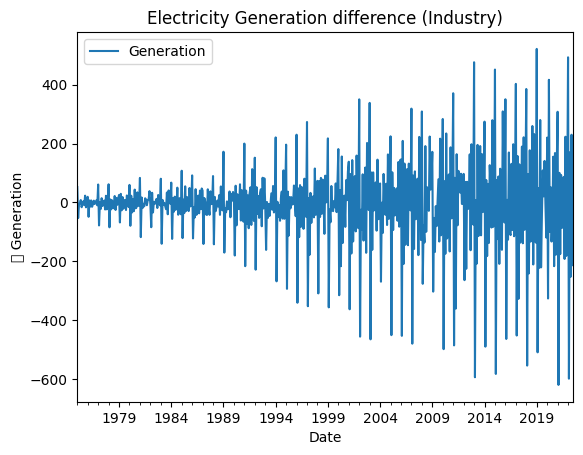

In [23]:
fig, ax = plt.subplots()
df_stationary.plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [24]:
results = adfuller(df_stationary['Generation'])

In [25]:
results

(-6.8814502209925426,
 1.4299677311031932e-09,
 13,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 6223.139872166015)

In [31]:
df_nplog = df.apply(np.log)

In [32]:
df_nplog

,Generation
Date,
2022-08-01,8.501328
2022-07-01,8.507628
2022-06-01,8.463539
2022-05-01,8.510914
2022-04-01,8.458759
...,...
1975-05-01,5.861925
1975-04-01,5.853925
1975-03-01,5.837147


C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 67843 (\N{PHOENICIAN LETTER DELT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


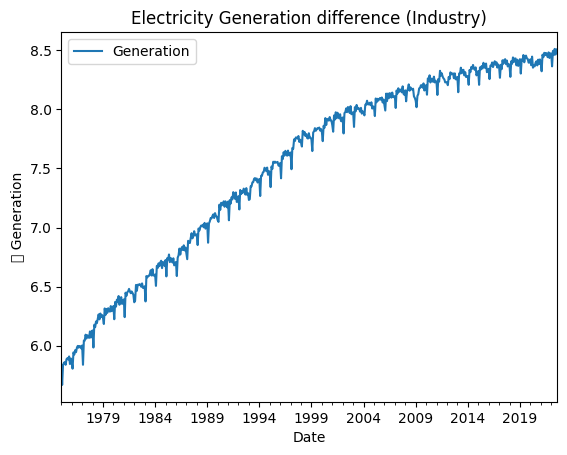

In [33]:
fig, ax = plt.subplots()
df_nplog.plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [34]:
results = adfuller(df_nplog['Generation'])

In [35]:
results

(3.777528379745783,
 1.0,
 14,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 -2365.1622887057456)

In [36]:
df_transformed = pd.Series(np.log(df['Generation'])).diff().dropna()

C:\Users\Laddi\anaconda3\envs\vertex\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 67843 (\N{PHOENICIAN LETTER DELT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


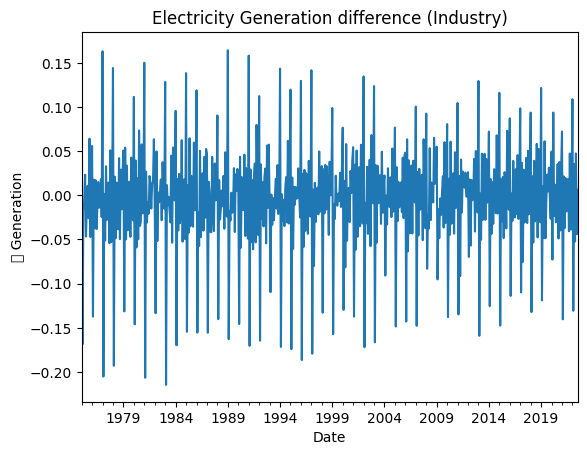

In [37]:
fig, ax = plt.subplots()
df_transformed.plot(ax=ax)
plt.title('Electricity Generation difference (Industry)')
plt.ylabel('𐤃 Generation')
plt.show()

In [39]:
results = adfuller(df_transformed)

In [40]:
results

(-4.686298410958571,
 8.928415320124701e-05,
 13,
 557,
 {'1%': -3.4421447800270673,
  '5%': -2.8667429272780858,
  '10%': -2.5695409929766093},
 -2346.7312195427685)

# Autoregressive (AR) Models:
#### AR(1) Model:
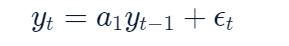
- eplison-t = white noise
- a1 is the autoregressive coefficient at lag one

#### AR(p) model:
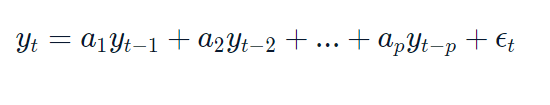


# Moving average (MA) Models:
#### MA(1) Model:
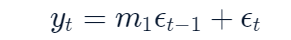
- m1 is the moving average coefficient

